## Import required libraries

In [67]:
# Import Basis
import pandas as pd 
import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import math
from io import StringIO
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import *
# Classifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# Paellete
# palette = ["#00B1D2FF", "#FDDB27FF"]
palette = ['gray', 'black']
color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

## Import and explore dataset

In [4]:
df = pd.read_excel("./Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

In [5]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,117.4466,109.9085,95.6774,26.5152,23.0687,30.1230,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,100.0578,105.6314,95.6610,27.2656,23.4952,28.1229,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,0.0014,0.7580,0.9968,130.9558,118.5703,103.8750,29.7036,24.6216,33.9053,-0.7152,-0.1059,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,86.7798,88.2531,82.3751,28.7288,24.4905,30.3955,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,105.5484,101.8132,85.3342,30.3205,25.0291,27.1741,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [7]:
df.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,0.0019,0.6794,0.9850,98.1696,86.0790,84.8254,29.6780,27.5947,26.7208,-0.2737,-0.0339,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,0.0015,0.6366,0.9875,93.6238,78.2098,73.1009,23.8141,23.7356,24.1884,-0.3319,0.5663,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,0.0017,0.5796,0.9945,88.2526,81.5870,81.9449,38.4674,39.3292,29.0821,0.1838,0.6385,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,0.0018,0.5924,0.9609,102.4622,91.4354,91.2533,30.9960,33.4524,25.2846,0.3400,0.8228,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY
897,343792,2289.2720,823.8438,534.7757,0.7607,661.6113,0.9781,351472,0.6941,1.5405,0.8243,0.8031,0.0024,0.0016,0.6449,0.9935,94.6863,77.3935,79.3460,30.7016,25.2166,23.7425,0.3382,0.5209,0.4318,2.5138,3.0369,3.0865,-31983476736,-20482514944,-21219354624,47.3454,38.6966,39.6738,SOGAY


In [10]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,0.857720,0.807190,0.003428,0.001794,0.655420,0.988680,100.165885,97.609401,96.194889,29.047436,26.383362,26.148330,0.089266,0.564139,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,0.070839,0.062175,0.020456,0.000428,0.094314,0.020473,32.126549,28.251801,21.627409,6.306931,5.462164,4.905078,0.943285,1.039813,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,0.004800,0.041100,0.001700,0.001100,0.001700,0.756800,30.382600,41.048000,44.256900,7.303800,8.655700,5.148600,-1.724200,-1.834400,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,0.827750,0.768050,0.002200,0.001500,0.589975,0.989300,76.448000,77.306125,78.502375,24.901525,22.289650,22.890975,-0.549900,-0.230200,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,0.867750,0.804950,0.002600,0.001600,0.647950,0.993600,107.682450,100.676000,99.225600,29.709450,25.638300,26.469000,-0.162700,0.243750,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,0.899500,0.848875,0.003200,0.002075,0.720625,0.996400,126.127450,119.159600,113.332250,33.274375,29.905325,29.482375,0.471025,1.406550,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,0.977300,0.968100,0.615400,0.004300,0.937300,0.999500,159.649400,166.135400,148.211400,48.571200,45.510700,42.422800,3.223600,3.697100,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [12]:
df.shape

(898, 35)

In [13]:
## Null values check
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [16]:
## duplicates check
if df.duplicated().any():
    print("Duplicates exist in the dataset.")
else:
    print("No duplicates found in the dataset")

No duplicates found in the dataset


### EDA

In [26]:
def plot_dynamic_column_distribution(df, column_name, n_plots=3, figsize=(15, 5*3), color_palette='viridis'):
    """
    Create a dynamic visualization of a column's distribution in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame
    - column_name: str, name of the column to analyze
    - n_plots: int, number of plots to display (1 to 3)
    - figsize: tuple, figure size
    - color_palette: str or list, color palette for the plots
    
    Returns:
    - fig: matplotlib figure object
    """
    # Determine if the column is numeric or categorical
    is_numeric = pd.api.types.is_numeric_dtype(df[column_name])
    
    fig, axes = plt.subplots(n_plots, 1, figsize=figsize)
    if n_plots == 1:
        axes = [axes]
    fig.suptitle(f'Distribution Analysis of {column_name}', fontsize=16)
    
    plot_functions = []
    if is_numeric:
        plot_functions = [
            ('Histogram with KDE', lambda ax: sns.histplot(data=df, x=column_name, kde=True, ax=ax, color=sns.color_palette(color_palette)[0])),
            ('Box Plot', lambda ax: sns.boxplot(data=df, y=column_name, ax=ax, color=sns.color_palette(color_palette)[1])),
            ('Violin Plot', lambda ax: sns.violinplot(data=df, y=column_name, ax=ax, color=sns.color_palette(color_palette)[2]))
        ]
    else:
        value_counts = df[column_name].value_counts()
        plot_functions = [
            ('Count Plot', lambda ax: sns.countplot(data=df, y=column_name, ax=ax, palette=color_palette)),
            ('Pie Chart', lambda ax: ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette(color_palette))),
            ('Horizontal Bar Plot', lambda ax: sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, palette=color_palette))
        ]
    
    for i, (title, plot_func) in enumerate(plot_functions[:n_plots]):
        plot_func(axes[i])
        axes[i].set_title(title)
        if is_numeric and title == 'Histogram with KDE':
            axes[i].set_xlabel(column_name)
            axes[i].set_ylabel('Count')
        elif not is_numeric and title == 'Horizontal Bar Plot':
            axes[i].set_xlabel('Count')
            axes[i].set_ylabel(column_name)
    
    # Add summary statistics
    if n_plots == 3:
        summary_stats = df[column_name].describe()
        axes[2].text(1.05, 0.5, 'Summary Statistics:\n\n' + '\n'.join([f"{stat}: {value:.2f}" if is_numeric else f"{stat}: {value}" 
                                                                      for stat, value in summary_stats.items()]),
                     transform=axes[2].transAxes, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    return fig

In [27]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

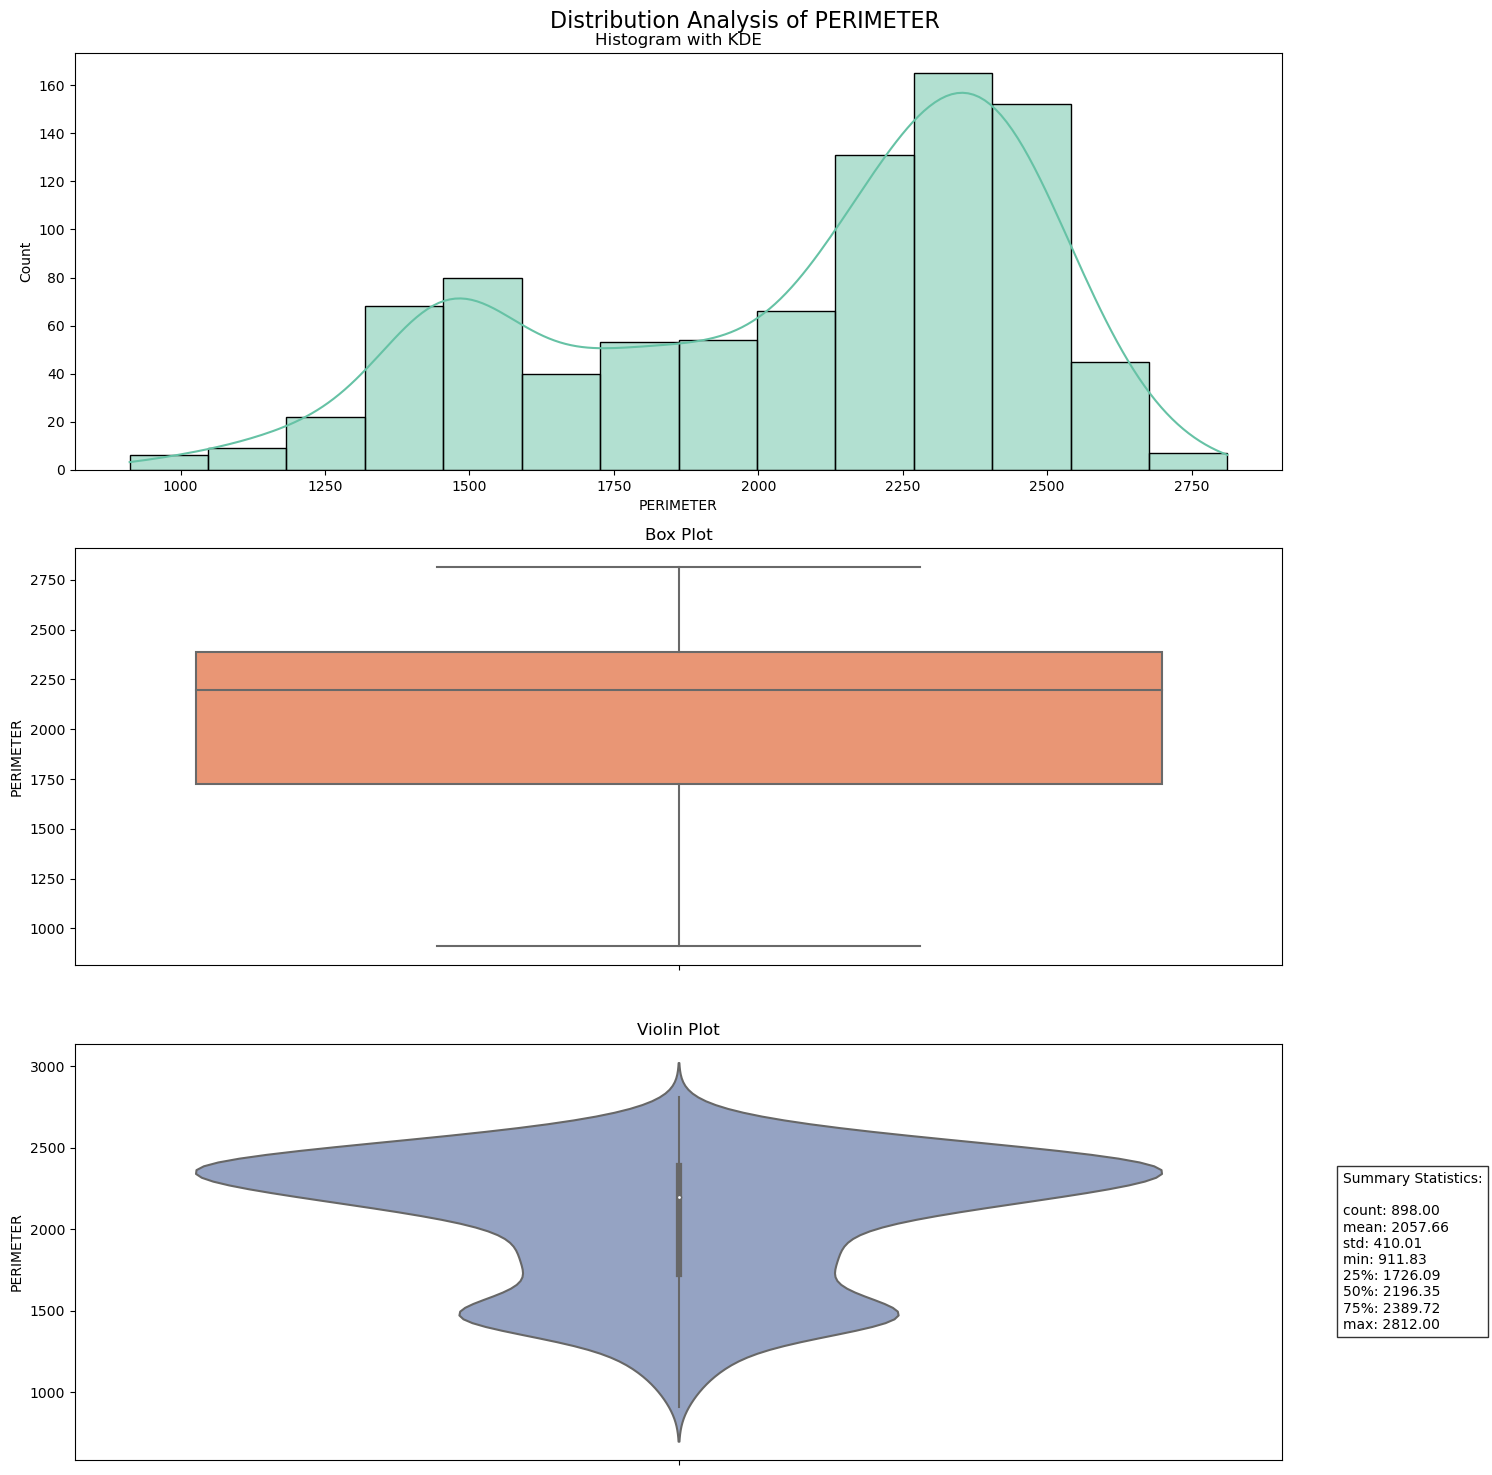

In [29]:
fig = plot_dynamic_column_distribution(df, 'PERIMETER', n_plots=3, color_palette='Set2')
plt.show

In [30]:
from scipy import stats
def advanced_scatter_plot(df, x_col, y_col, hue_col=None, size_col=None, style_col=None, 
                          regression=False, outliers=False, distribution=False, 
                          figsize=(12, 8), color_palette='viridis'):
    """
    Create an advanced scatter plot with optional features like regression line, 
    outlier detection, and distribution plots.

    Parameters:
    - df: pandas DataFrame
    - x_col, y_col: str, column names for x and y axes
    - hue_col: str, column name for color encoding (optional)
    - size_col: str, column name for point size encoding (optional)
    - style_col: str, column name for point style encoding (optional)
    - regression: bool, whether to add a regression line
    - outliers: bool, whether to highlight potential outliers
    - distribution: bool, whether to add marginal distribution plots
    - figsize: tuple, figure size
    - color_palette: str or list, color palette for the plot

    Returns:
    - fig: matplotlib figure object
    """
    # Check if columns exist in the dataframe
    for col in [x_col, y_col, hue_col, size_col, style_col]:
        if col and col not in df.columns:
            raise ValueError(f"Column '{col}' not found in the dataframe.")

    # Set up the plot
    if distribution:
        fig = plt.figure(figsize=figsize)
        gs = fig.add_gridspec(3, 3)
        ax_main = fig.add_subplot(gs[1:, :-1])
        ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)
        ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
    else:
        fig, ax_main = plt.subplots(figsize=figsize)
        ax_top = ax_right = None

    # Create the main scatter plot
    scatter_kws = {}
    if size_col:
        scatter_kws['size'] = df[size_col]
    if style_col:
        scatter_kws['style'] = df[style_col]

    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, 
                    palette=color_palette, ax=ax_main, **scatter_kws)

    # Add regression line if requested
    if regression:
        sns.regplot(data=df, x=x_col, y=y_col, scatter=False, 
                    color='red', ax=ax_main)

    # Highlight potential outliers if requested
    if outliers:
        z_scores = np.abs(stats.zscore(df[[x_col, y_col]]))
        outliers = (z_scores > 3).any(axis=1)
        ax_main.scatter(df[outliers][x_col], df[outliers][y_col], 
                        color='red', s=80, facecolors='none', label='Potential Outliers')

    # Add distribution plots if requested
    if distribution:
        sns.histplot(data=df, x=x_col, ax=ax_top, kde=True, color='skyblue')
        sns.histplot(data=df, y=y_col, ax=ax_right, kde=True, color='skyblue')
        ax_top.set_title('')
        ax_right.set_title('')

    # Set labels and title
    ax_main.set_xlabel(x_col)
    ax_main.set_ylabel(y_col)
    plt.suptitle(f"{y_col} vs {x_col}", fontsize=16)

    # Add correlation coefficient
    corr = df[x_col].corr(df[y_col])
    ax_main.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), 
                     xycoords='axes fraction', fontsize=12, 
                     ha='left', va='top')

    # Adjust layout and show plot
    plt.tight_layout()
    return fig


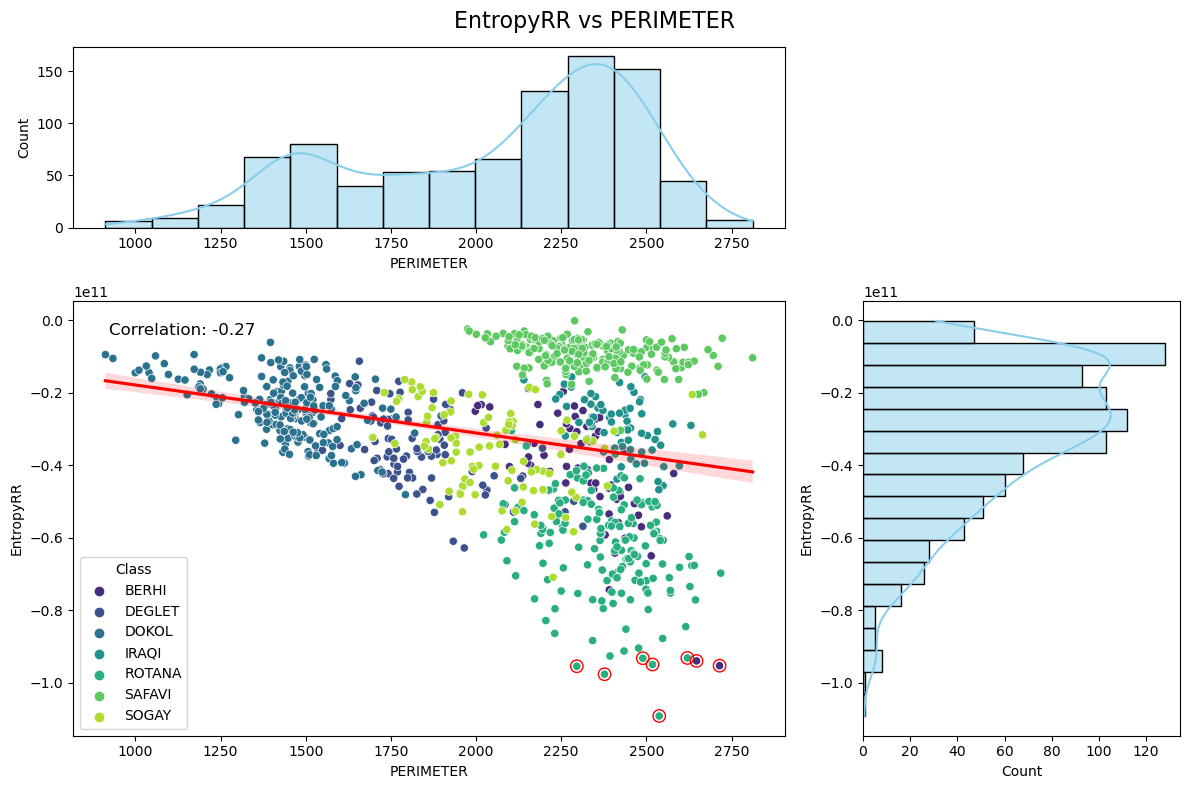

In [32]:
fig = advanced_scatter_plot(df, 'PERIMETER', 'EntropyRR', hue_col='Class', 
                            regression=True, outliers=True, distribution=True)
plt.show()

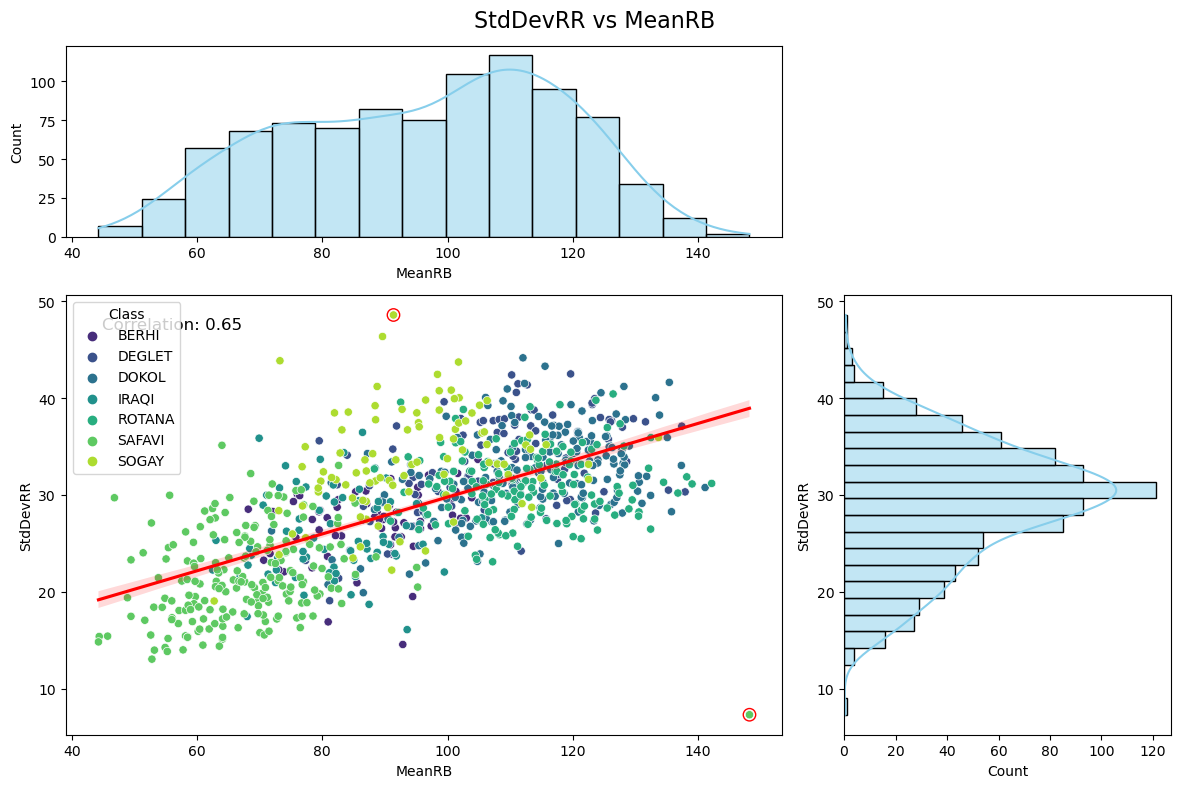

In [38]:
advanced_scatter_plot(df, "MeanRB","StdDevRR", hue_col="Class",regression=True, outliers=True, distribution=True)
plt.show()

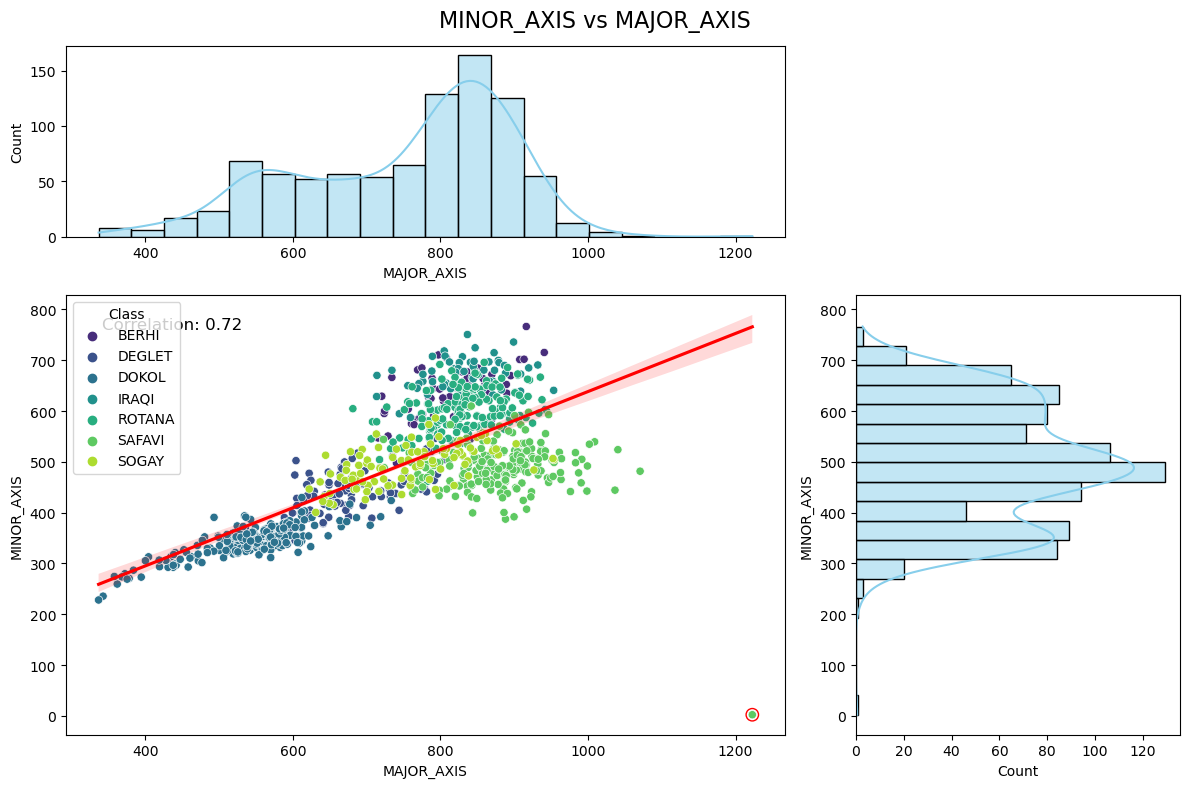

In [39]:
advanced_scatter_plot(df, "MAJOR_AXIS","MINOR_AXIS", hue_col="Class",regression=True, outliers=True, distribution=True)
plt.show()

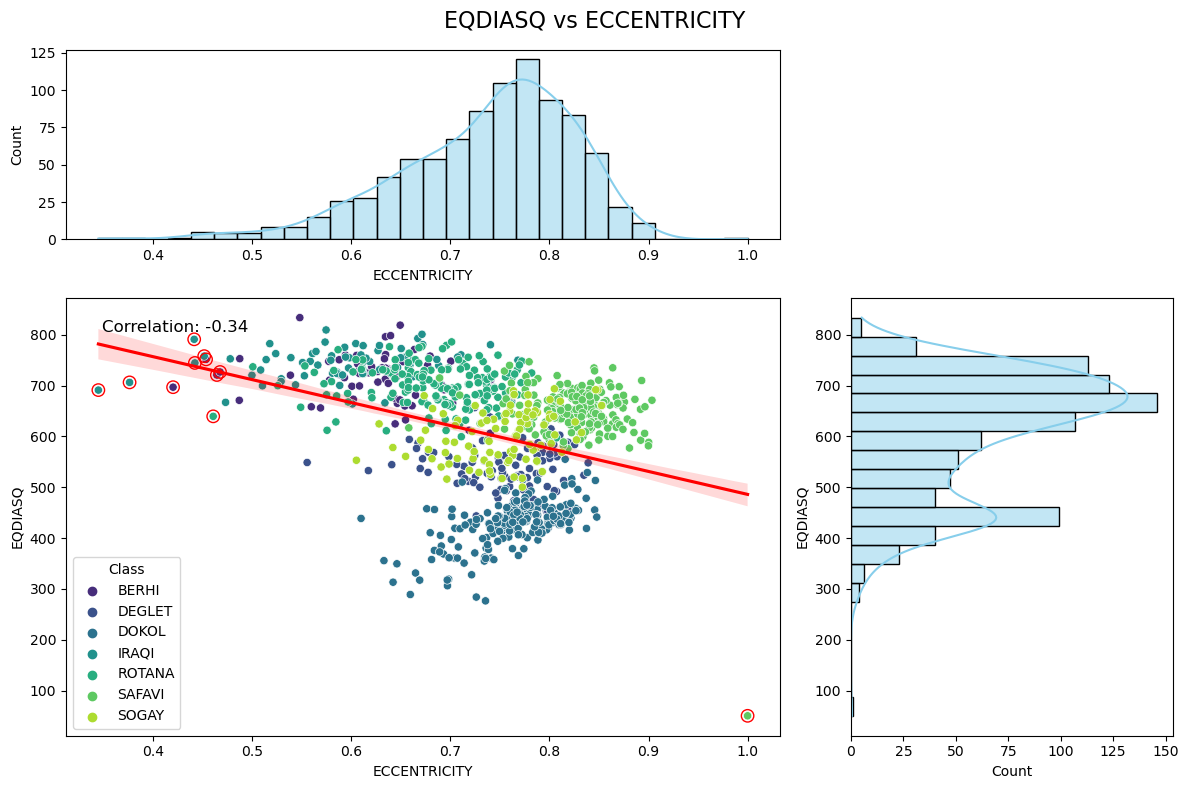

In [40]:
advanced_scatter_plot(df, "ECCENTRICITY","EQDIASQ", hue_col="Class",regression=True, outliers=True, distribution=True)
plt.show()

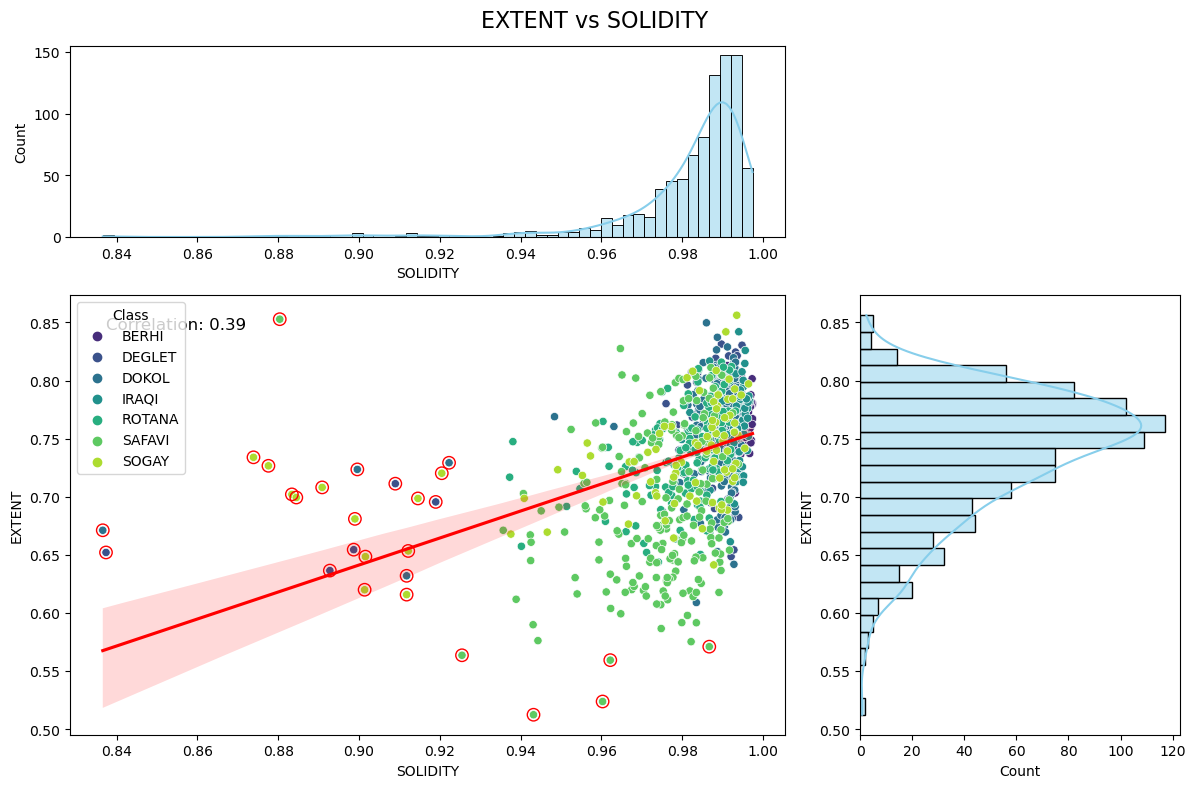

In [41]:
advanced_scatter_plot(df, "SOLIDITY","EXTENT", hue_col="Class",regression=True, outliers=True, distribution=True)
plt.show()

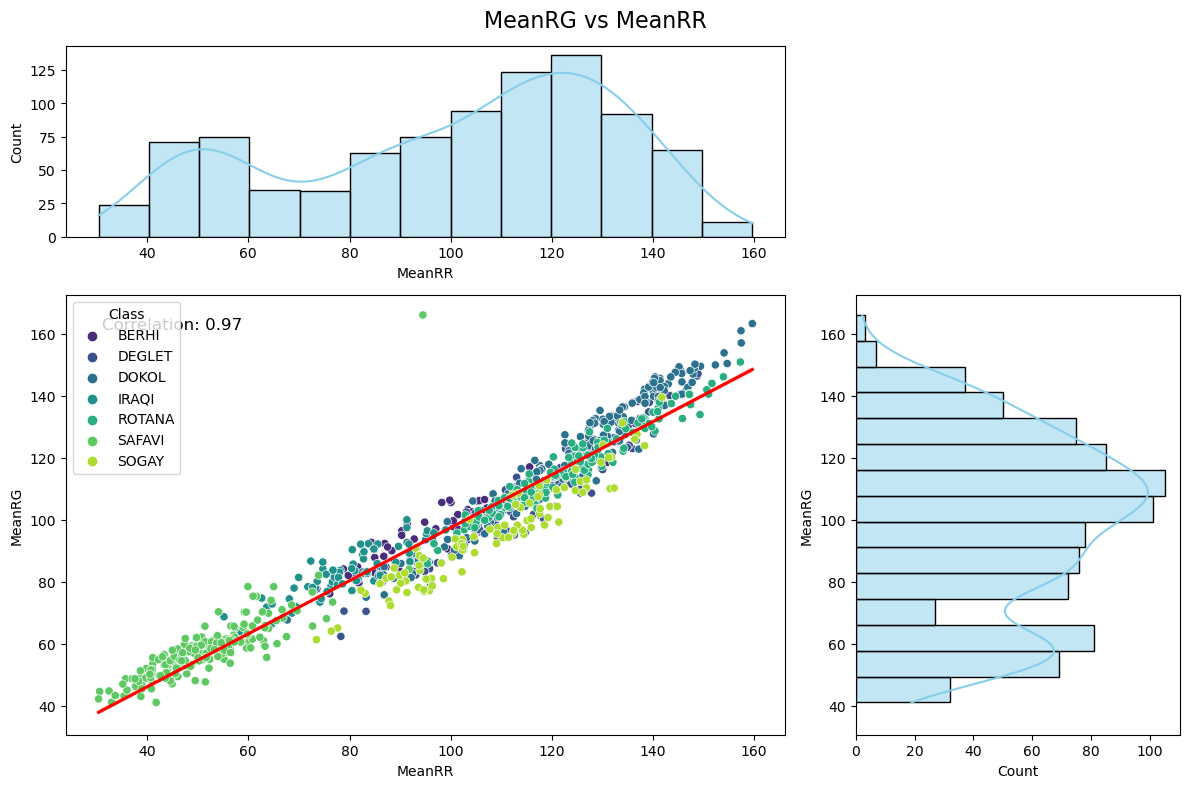

In [42]:
advanced_scatter_plot(df, "MeanRR","MeanRG", hue_col="Class",regression=True, outliers=True, distribution=True)
plt.show()

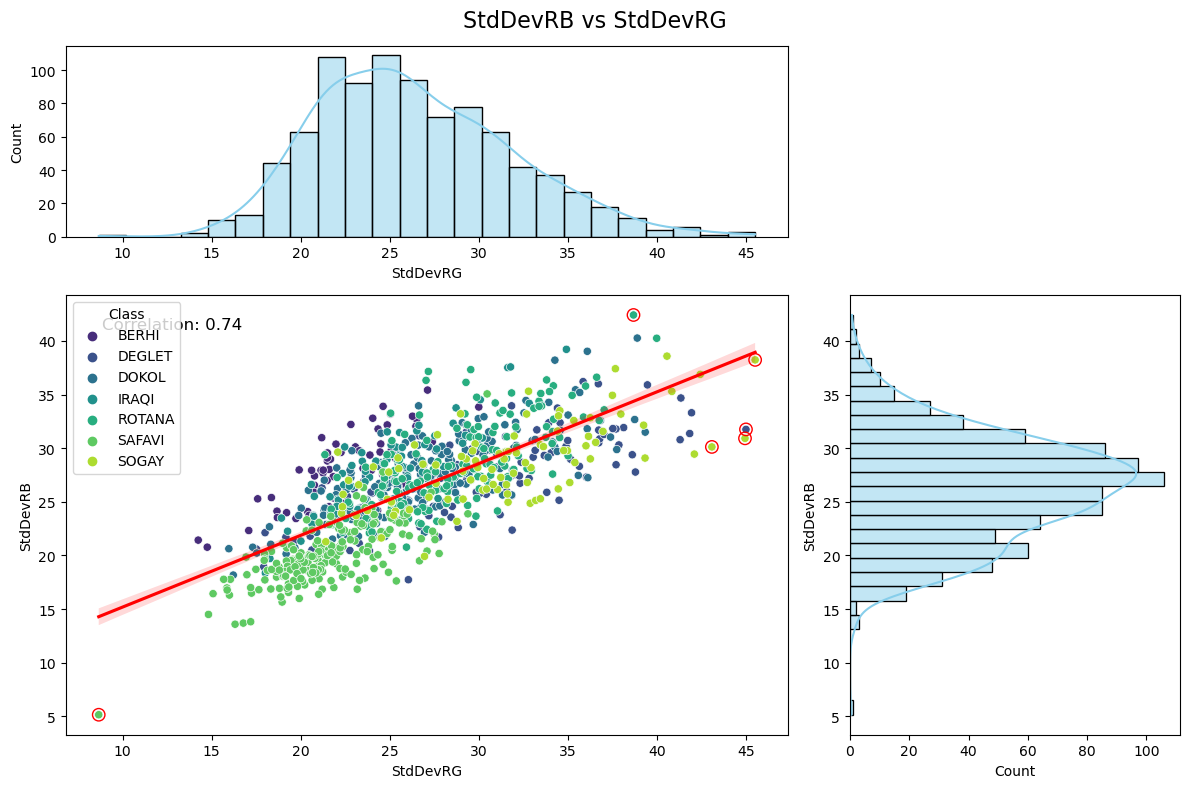

In [43]:
advanced_scatter_plot(df, "StdDevRG","StdDevRB", hue_col="Class",regression=True, outliers=True, distribution=True)
plt.show()

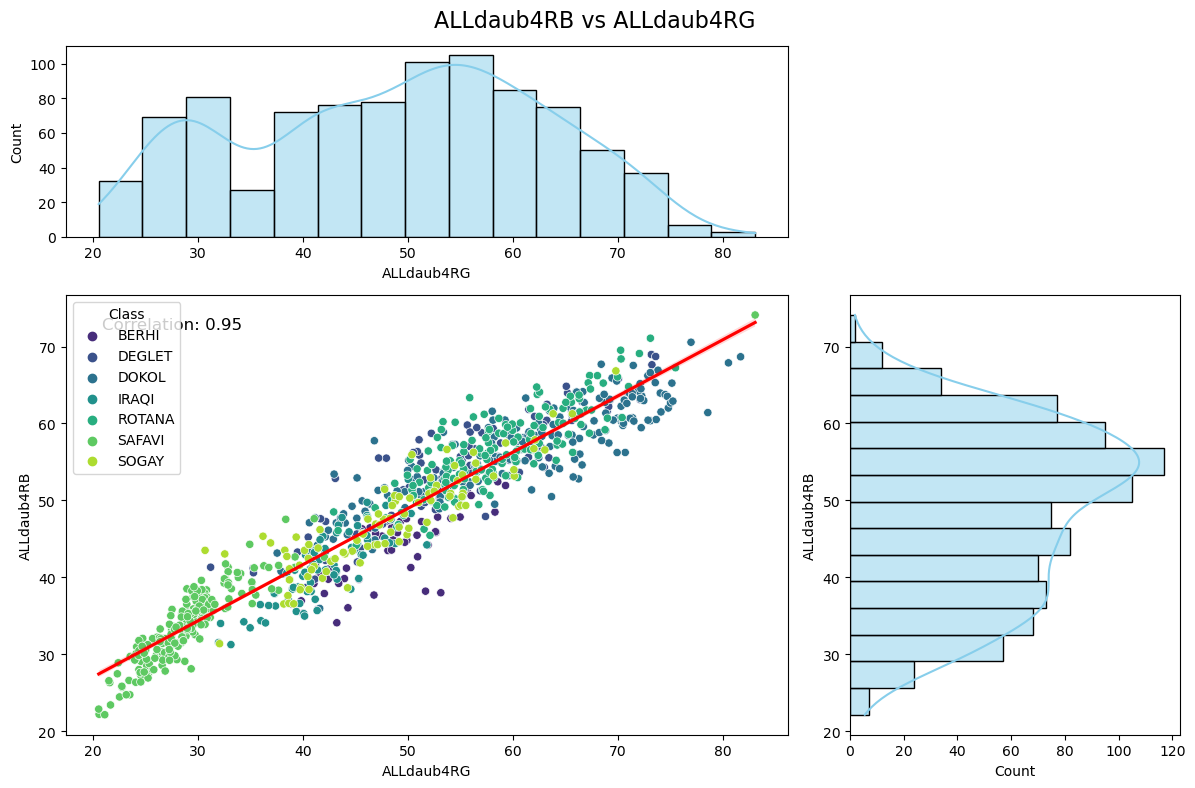

In [44]:
advanced_scatter_plot(df, "ALLdaub4RG","ALLdaub4RB", hue_col="Class",regression=True, outliers=True, distribution=True)
plt.show()

In [47]:
#Encoding the Data
def encode(df):
    for col in df.columns:
        if df[col].dtype == "object" or df[col].dtype == "category":
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df
df = encode(df)
print("successfully encoded")

successfully encoded


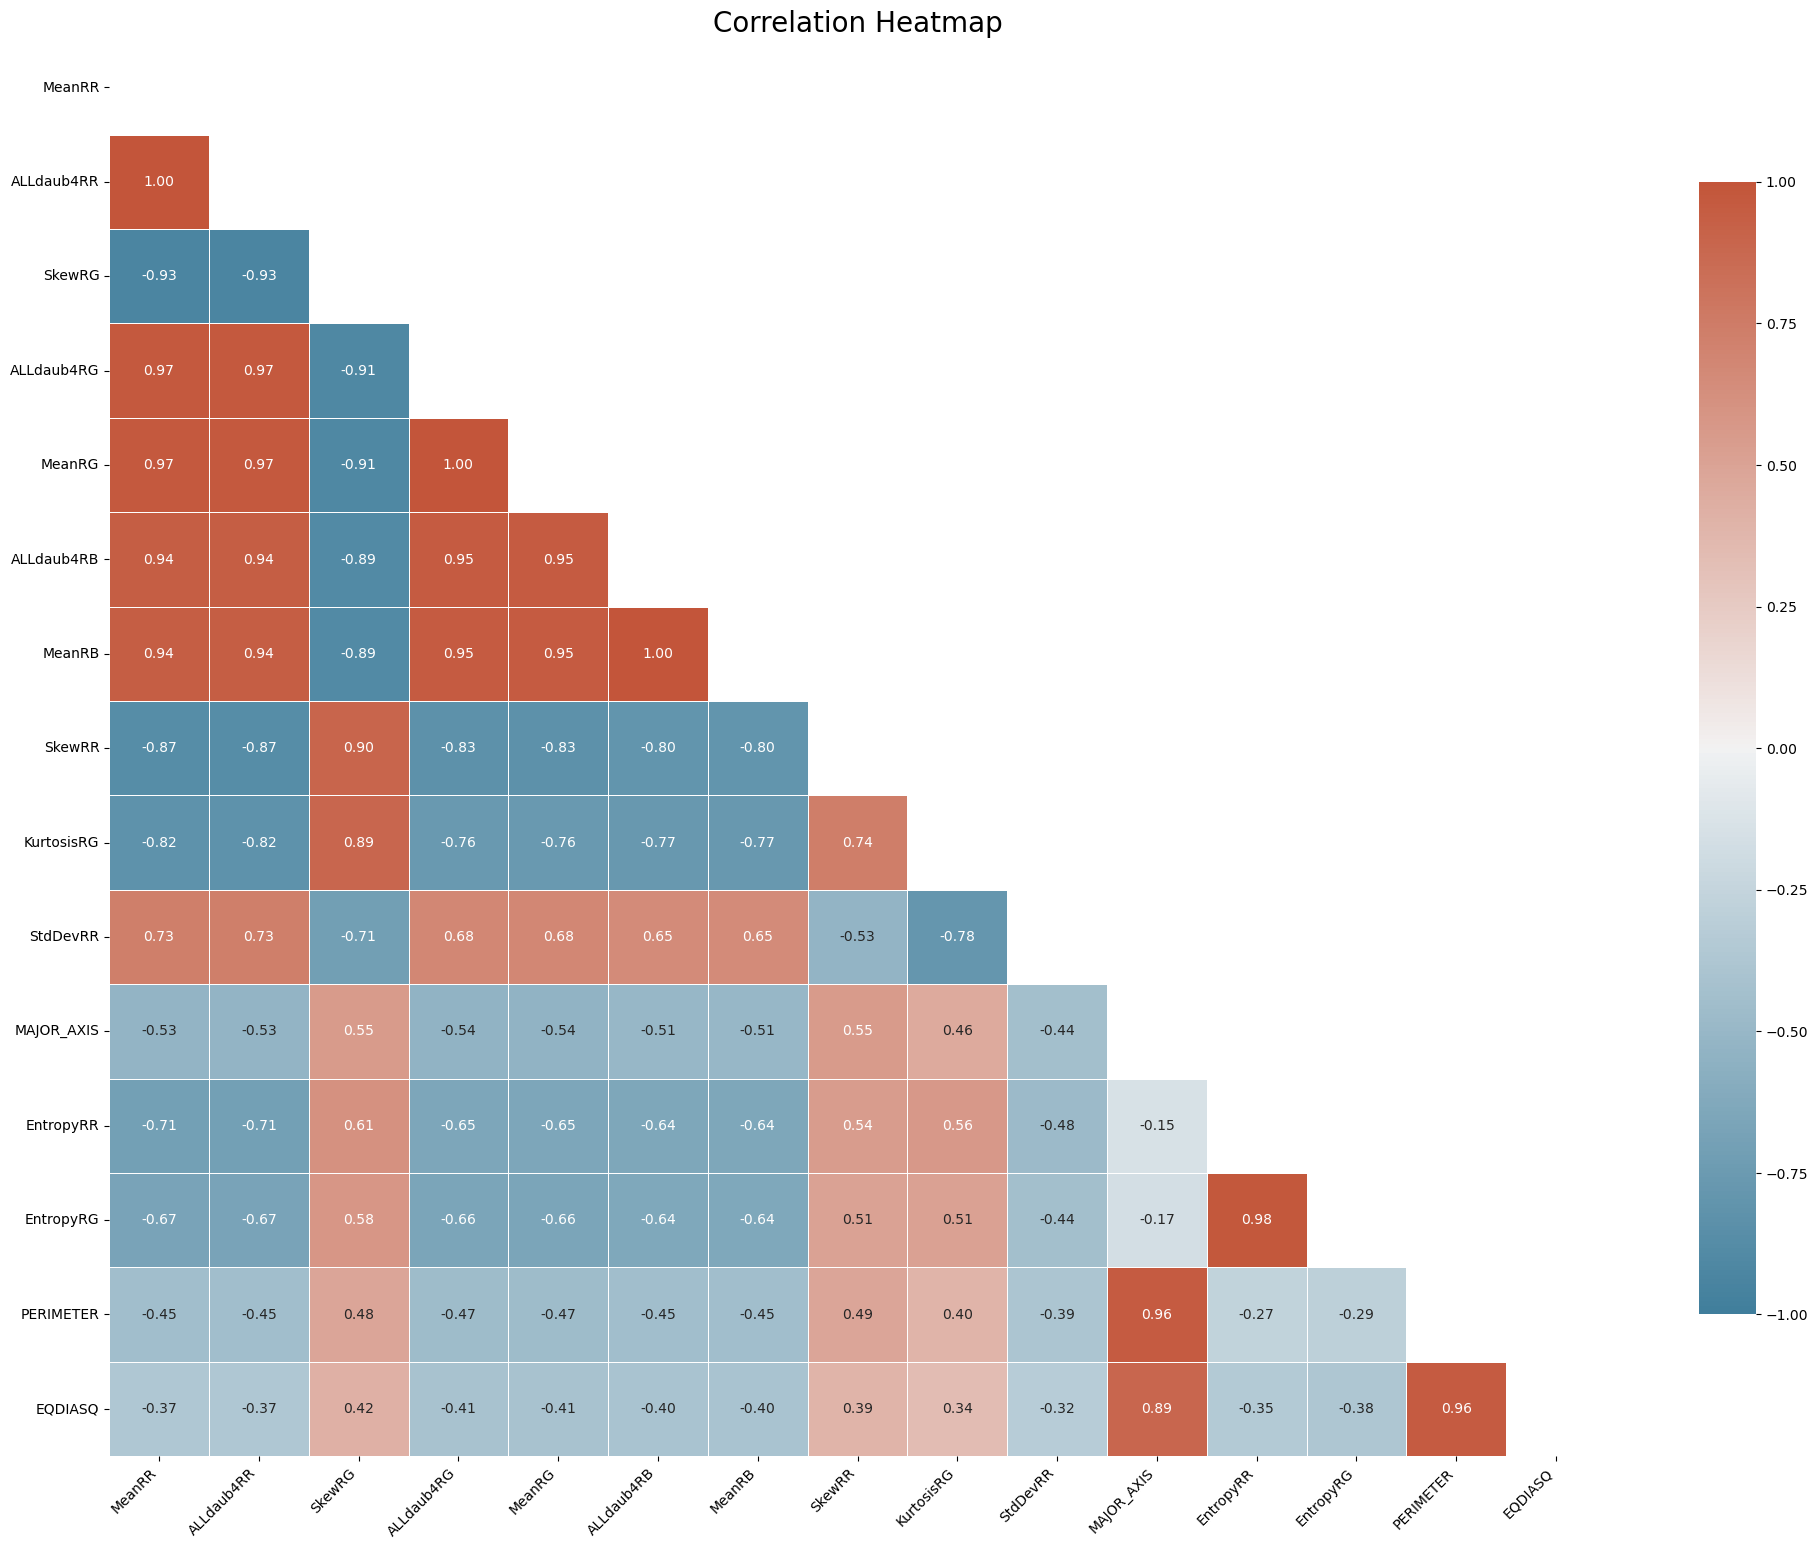

In [49]:
corr_matrix = df.corr(method='pearson')  # You can change 'pearson' to 'spearman' or 'kendall' if needed

# Optional: Select top N features based on correlation
N = 15  # Change this to include more or fewer features
corr_sum = corr_matrix.abs().sum().sort_values(ascending=False)
top_features = corr_sum.head(N).index
corr_matrix = corr_matrix.loc[top_features, top_features]

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Optional: Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create custom diverging palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, 
            mask=mask,  # Comment this line if you want to show the full matrix
            annot=True, 
            cmap=cmap, 
            vmin=-1, 
            vmax=1, 
            center=0,
            fmt=".2f", 
            linewidths=0.5, 
            cbar_kws={"shrink": .8})

# Customize the plot
plt.title("Correlation Heatmap", fontsize=20)
plt.tight_layout()

# Optional: Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Optional: Adjust y-axis labels
plt.yticks(rotation=0)

# Show the plot
plt.show()

## Modeling 

In [50]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=42)


In [51]:
X_train.shape

(808, 34)

In [52]:
X_test.shape

(90, 34)

1 - XGBOOST \
2 - random_Forest \
3 - lightgbm \
4 - catboost

In [63]:
def evaluate_model(model_name):
    models = {"xgboost": xgb.XGBClassifier(objective= "multi:softprob", n_estimators = 500, max_depth = 6, random_state = 42, eval_metric= "mlogloss"),
        'random_forest': RandomForestClassifier(n_estimators=500, random_state = 42),
        'lightgbm': lgb.LGBMClassifier(objective= "multiclass", n_estimators= 500, max_depth= 6, random_state= 42, metric= "multi_logloss", verbose=-1),
        'catboost': CatBoostClassifier(iterations= 1000, depth= 6, eval_metric= "MultiClass", random_state= 42, verbose=0)}

    model = models[model_name]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    #Calculate evaluation metrics
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test, Y_pred, average="weighted")
    
    recall = recall_score(Y_test, Y_pred, average='weighted')  
    cm = confusion_matrix(Y_test, Y_pred)
    
    # display results
    print("Model Evaluation:")
    print(f"The Accuracy Of {model_name} is: {accuracy:.2f}")
    print(f"The Precision Of {model_name} is: {precision:.2f}")
    print(f"The Recall Of {model_name} is: {recall:.2f}")
    print("Confusion Matrix:")
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap=palette, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Model Evaluation:
The Accuracy Of xgboost is: 0.92
The Precision Of xgboost is: 0.93
The Recall Of xgboost is: 0.92
Confusion Matrix:


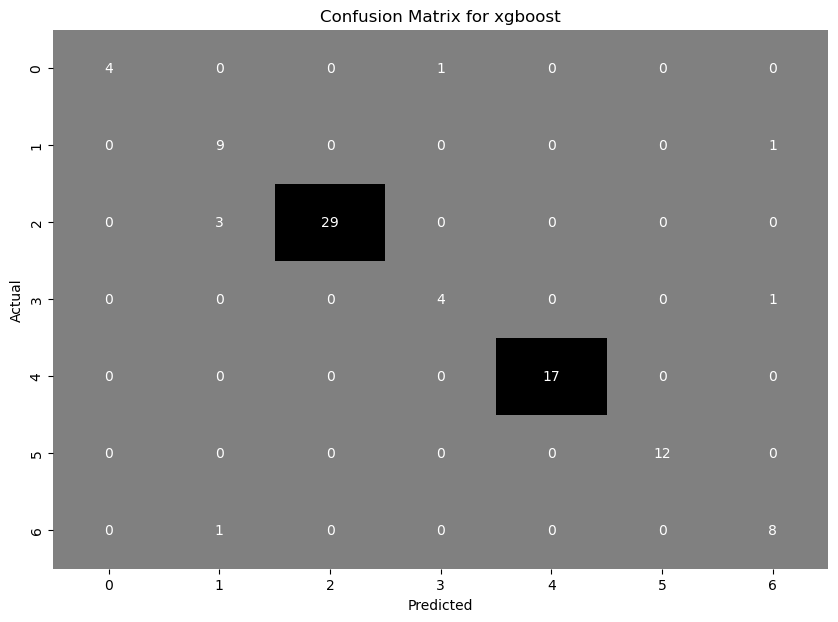

In [68]:
evaluate_model("xgboost")

Model Evaluation:
The Accuracy Of random_forest is: 0.91
The Precision Of random_forest is: 0.93
The Recall Of random_forest is: 0.91
Confusion Matrix:


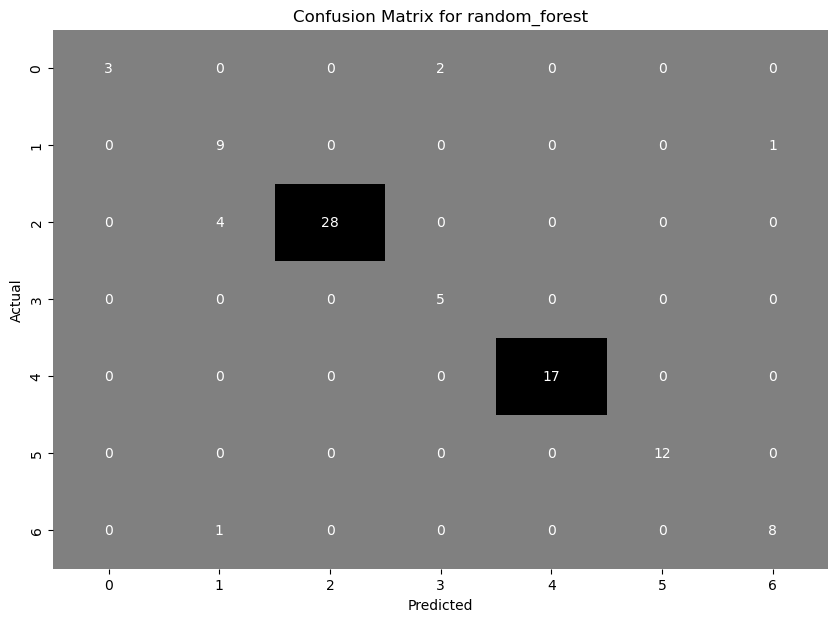

In [69]:
evaluate_model("random_forest")

Model Evaluation:
The Accuracy Of lightgbm is: 0.87
The Precision Of lightgbm is: 0.89
The Recall Of lightgbm is: 0.87
Confusion Matrix:


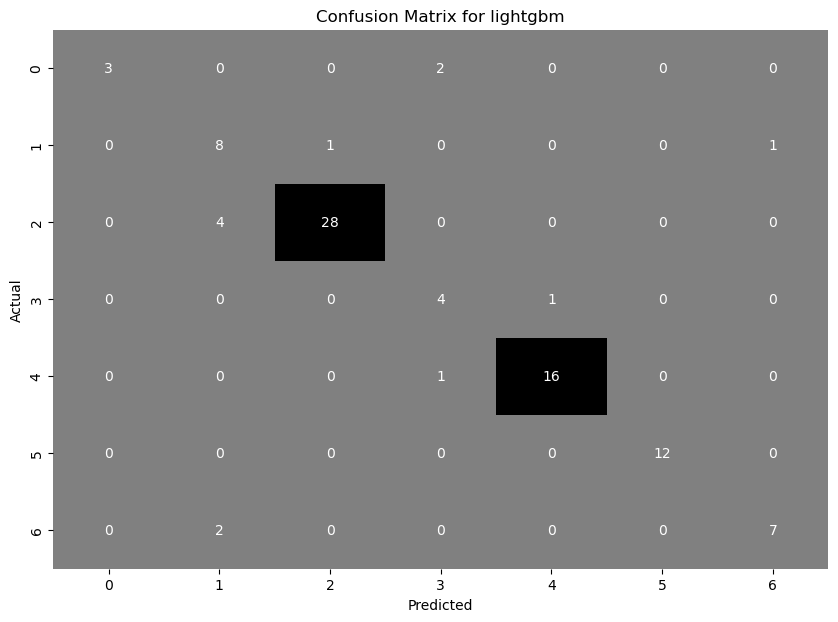

In [70]:
# LightGBM
evaluate_model("lightgbm")

Model Evaluation:
The Accuracy Of catboost is: 0.90
The Precision Of catboost is: 0.92
The Recall Of catboost is: 0.90
Confusion Matrix:


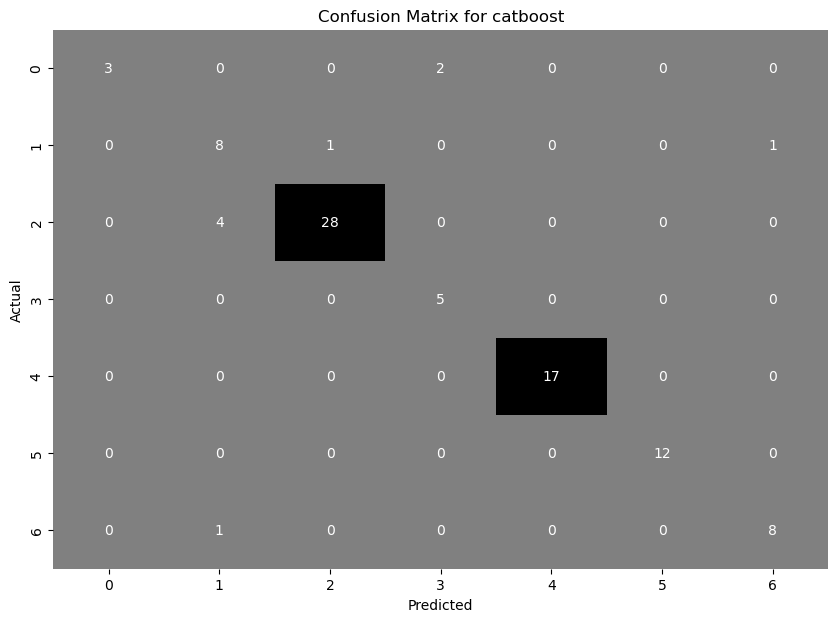

In [71]:
# CatBoost
evaluate_model("catboost")